In [1]:
import matplotlib
import matplotlib.pyplot as plt
from mnist import MNIST
mndata = MNIST('C:\\Users\\jpv\\Dropbox\\src\\grokking_deep_learning')
images, labels = mndata.load_training()

print("num images: {}".format(len(images)))
print("num images: {}".format(len(labels)))

num images: 60000
num images: 60000


In [2]:
import vector_ops as vops
def show_number(raw_image, label):
    """interprets raw_image as a 28x28 matrix and displays it"""
    image = vops.matrix_of_zeroes(28, 28)

    offset = 0
    for row in range(28):
        lastOffset = offset
        offset += 28
        image[row] = raw_image[lastOffset:offset] 

    plt.matshow(image)
    plt.show()
    print("This is {}".format(label)) 

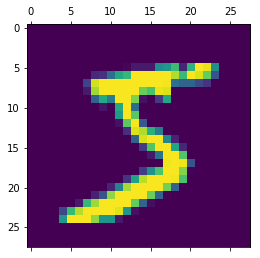

This is 5


In [3]:
#for i in range(10):
#    show_number(images[i], labels[i]) 
show_number(images[0], labels[0]) 

In [4]:
def elementwise_multiplication(vec_a, vec_b):
    assert(len(vec_a) == len(vec_b))
    res = []
    for ix, item in enumerate(vec_a):
        res.append(vec_a[ix] * vec_b[ix])
    return res

In [5]:
def w_sum(vec_a, vec_b):
    #print("len vec_a {} \n len vec_b {}".format(len(vec_a), len(vec_b)))
    assert(len(vec_a) == len(vec_b))
    multiplied_elements = elementwise_multiplication(vec_a, vec_b)
    return vector_sum(multiplied_elements)

In [6]:
def vector_of_zeroes(len):
    return [0] * len

In [7]:
def matrix_of_zeroes(rows, columns):
    res = []
    for r in range(rows):
        res.append([0] * columns)
    return res

In [8]:
def outer_prod(vec_a, vec_b):
    #print("vec_a: {}, vec_b: {}".format(vec_a, vec_b))
    res = matrix_of_zeroes(len(vec_a), len(vec_b))
    for i in range(len(vec_a)):
        for j in range(len(vec_b)):
            res[i][j] = vec_a[i] * vec_b[j]
    return res

In [9]:
def vector_sum(vec_a):
    res = 0
    for elem in vec_a:
        res += elem
    return res

In [10]:
#%pdb
def vect_mat_mul(vect, matrix):
    #print("vect{} \n matrix {}".format(vect, matrix))
    #print("len vect {} \n len matrix {}".format(len(vect), len(matrix)))
    assert(len(vect) == len(matrix))
    output = vector_of_zeroes(len(vect))
    for i in range(len(vect)):
        print("** i={}, len(vect)={}, len(matrix[i])={}".format(i, len(vect), len(matrix[i])))
        output[i] = w_sum(vect,matrix[i])
        print("output[i]={}".format(output[i]))
    return output

In [11]:
def neural_network(inputs, weights):
    #return vect_mat_mul(inputs, weights)
    assert(len(inputs) == len(weights[0]))
    # multiply each input value with each weight vector in weights
    # and append the vector sum to output
    output = vector_of_zeroes(len(weights)) # predictions; one per possible result
    for i, vector in enumerate(weights):
        output[i] = w_sum(inputs, vector)
    return output

In [19]:
sample = 0; # represents number 5
input = images[0]
goal_predictions = [
    [1,0,0,0,0,0,0,0,0,0], # P(0) = 1
    [0,1,0,0,0,0,0,0,0,0], # 1
    [0,0,1,0,0,0,0,0,0,0], # 2
    [0,0,0,1,0,0,0,0,0,0], # 3
    [0,0,0,0,1,0,0,0,0,0], # 4
    [0,0,0,0,0,1,0,0,0,0], # 5
    [0,0,0,0,0,0,1,0,0,0], # 6
    [0,0,0,0,0,0,0,1,0,0], # 7
    [0,0,0,0,0,0,0,0,1,0], # 8
    [0,0,0,0,0,0,0,0,0,1]  # 9
]

label = labels[sample]

goal_prediction = goal_predictions[label]

#784 (28*28 pixels) inputs (one per pixel) and 10 predictions, each a number describing the likelihood of it being true
#each prediction has a weight for every one of the 784 pixels/inputs

#there is a set of 28*28 weights for each output
weights = []
for i in range(10):
    weights.append([0] * len(input))

alpha = 0.010
    
for x in range(10):
    pred = neural_network(input, weights) 
    print(pred)
    error = [0] * len(goal_prediction)
    delta = [0] * len(goal_prediction)

    for i in range(len(goal_prediction)):
        error[i] = (pred[i] - goal_prediction[i]) ** 2
        delta[i] = pred[i] - goal_prediction[i]

    #print("error: {}, delta: {}".format(error, delta))

    weight_deltas = outer_prod(input, delta)
    print(weight_deltas)
    
    #update weights

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0